(sor-method-section)=

# The Successive Over Relaxation (SOR) method

The **Successive Over Relaxation (SOR)** method improves on the convergence rate of the [Gauss-Seidel](gauss-seidel-method-section) method by applying a weighting factor to the updated estimates to adjust the extent of the change. Let $\omega$ be a **relaxation parameter** in the range $[0,2]$ then the SOR method is

:::{prf:definition} The Successive Over Relaxation (SOR) method
:label: sor-method-definition

The SOR method for solving a system of linear equations of the form $A \mathbf{x} = \mathbf{b}$ is

$$ x_i^{(k+1)} =(1 - \omega) x_i^{(k)} + \frac{\omega}{a_{ii} }\left(b_i - \sum_{j=1}^{i-1} a_{ij} x_j^{(k+1)} -\sum_{j=i+1}^n a_{ij} x_j^{(k)} \right), \qquad i = 1, \ldots, n. $$(sor-method-equation)

where $\omega \in [0, 2]$.
:::

The iteration matrix for the SOR method is derived by writing the coefficient matrix of the linear system $A\mathbf{x}=\mathbf{b}$ using

$$ A = L+\left(1-\frac{1}{\omega }\right)D+\frac{1}{\omega }D+U. $$

Substituting into the linear system $A \mathbf{x} = \mathbf{b}$ and rearranging

$$ \begin{align*}
    \left(L+\left(1-\frac{1}{\omega }\right)D+\frac{1}{\omega }D+U\right)\mathbf{x}&=\mathbf{b}\\
    (D+\omega L)\mathbf{x}+((\omega -1)D+\omega U)\mathbf{x}&=\omega \mathbf{b}\\
    (D+\omega L)\mathbf{x}&=((1-\omega )D-\omega U)\mathbf{x}+\omega \mathbf{b}\\
    \mathbf{x}&=(D+\omega L)^{-1} ((1-\omega )D-\omega U)\mathbf{x}+(D+\omega L)^{-1} \omega \mathbf{b}.
\end{align*} $$

So the matrix form of the SOR method is

$$ \mathbf{x}^{(k+1)} =(D+\omega L)^{-1} ((1-\omega )D-\omega U)\mathbf{x}^{(k)} +(D+\omega L)^{-1} \omega \mathbf{b} $$

and the iteration matrix is

$$ T_{SOR} =(D+\omega L)^{-1} ((1-\omega )D-\omega U). $$(sor-method-iteration-matrix-equation)

The value of $\omega$ affects the rate of convergence of the SOR method and is determined by how the Gauss-Seidel method converges to the exact solution. Consider the diagrams in {numref}`over-relaxation-figure` and {numref}`under-relaxation-figure` below that shows the two types of convergence of the Gauss-Seidel method. When we have monotonic convergence where each successive iteration approaches the exact solution from a single side ({numref}`over-relaxation-figure`), the rate of convergence is improved by using $\omega > 1$ so that the change in subsequent approximations is increased. When we have oscillatory convergence where successive iterations overshoot the exact solution ({numref}`under-relaxation-figure`) the rate of convergence is improved by using $\omega < 1$ so that the change in the subsequent approximation is decreased.

:::{figure} ../images/sor_1.svg
:name: over-relaxation-figure
:width: 400

The estimated solution approaches the exact solution monotonically.
:::

:::{figure} ../images/sor_2.svg
:name: under-relaxation-figure
:width: 400

The estimated solution oscillates about the exact solution.
:::

(optimum-relaxation-parameter-section)=
## Optimum value of the relaxation parameter

The optimum value of $\omega$ will be the one that minimises the spectral radius of the iteration matrix. The iteration matrix will depend on the value of $\omega$. One way to estimate the optimum value of $\omega$ is to calculate $\rho(T_{SOR})$ for values in the range $\omega \in [0, 2]$ and choose the value of $\omega$ which minimises this value. This has been done for the system of linear equations from {prf:ref}`jacobi-method-example` and the plot is shown in {numref}`optimum-relaxation-parameter-figure`.

:::{glue:figure} optimum_omega_plot
:name: optimum-relaxation-parameter-figure
:figwidth: 600

Plot of the spectral radius $\rho(T_{SOR})$ of the iteration matrix for the SOR method when used to solve the system of linear equations from {prf:ref}`jacobi-method-example`.
:::

So an estimation of the optimum value of the relaxation parameters is $\omega = 1.25$. If the coefficient matrix $A$ has real eigenvalues we can use the following theorem to calculate the exact value of $\omega$. 


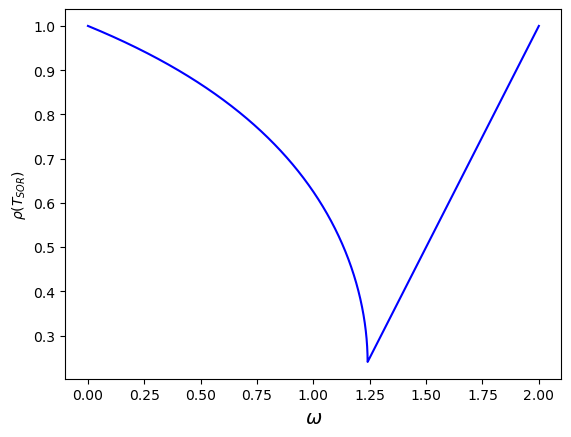

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sor_iteration_matrix(A, omega):
    L = np.tril(A, -1)
    U = np.triu(A, 1)
    D = A - L - U
    return np.dot(np.linalg.inv(D + omega * L), ((1 - omega) * D - omega * U))


# Define coefficient matrix
A = np.array([[4, 3, 0], [3, 4, -1], [0, -1, 4]])

# Loop through values of omega and calculate the spectral radius of the iteration matrix
omega = np.arange(0, 2 + 1e-4, 1e-4)
rho = np.zeros(omega.shape)
for i in range(len(omega)):
    T_SOR = sor_iteration_matrix(A, omega[i])
    rho[i] = max(abs(np.linalg.eigvals(T_SOR)))
    
# Plot spectral radii
fig, ax = plt.subplots()
plt.plot(omega, rho, "b")
plt.xlabel("$\omega$", fontsize=14)
plt.ylabel(r"$\rho(T_{SOR})$")
plt.show()

from myst_nb import glue
glue("optimum_omega_plot", fig, display=False)


:::{prf:theorem} Optimum relaxation parameter
:label: optimum-relaxation-parameter-theorem

If a system of linear equations of the form $A\mathbf{x}=\mathbf{b}$ has a coefficient matrix $A$ with all real eigenvalues then the optimum relaxation parameter for the SOR method can be calculated using

$$ \omega_{opt} = 1+{\left(\frac{\rho (T_J )}{1+\sqrt{1-\rho (T_J )^2 }}\right)}^2, $$(optimum-relaxation-parameter-equation)

where $\rho(T_J)$ is the spectral radius of the iteration matrix of the Jacobi method calculation using equation {eq}`jacobi-method-iteration-matrix-equation`.
:::

:::::{prf:example}
:label: optimum-relaxation-parameter-example

Determine the optimum relaxation parameter for the SOR method when applied to the system of linear equations from {prf:ref}`jacobi-method-example` using equation {eq}`optimum-relaxation-parameter-equation`.

::::{dropdown} Solution (click to show)

We saw in {prf:ref}`convergence-example` that the spectral radius of the iteration matrix for the Jacobi method for this system is $\rho(T_J )=0.7906$.

Using equation {eq}`optimum-relaxation-parameter-equation`

$$ \begin{align*}
    \omega = 1 + \left( \frac{0.7906}{1 + \sqrt{1 - 0.7906)^2}} \right)^2 \approx 1.2404.
\end{align*} $$
::::
:::::

:::::{prf:example}
:label: sor-method-example

Solve the system of linear equations from from {prf:ref}`jacobi-method-example` using the SOR method with $\omega = 1.24$ and an accuracy tolerance of $tol = 10^{-4}$

$$ \begin{align*}
    4x_1 +3x_2 &=-2,\\
    3x_1 +4x_2 -x_3 &=-8,\\
    -x_2 +4x_3 &=14.
\end{align*} $$

:::{dropdown} Solution (click to show)
 
The SOR method for this system is

$$ \begin{align*}
    x_{1}^{(k+1)} &= (1 - \omega) x_{1}^{(k)} + \frac{\omega}{4} \left( -2 - 3 x_{2}^{{(k)}} \right), \\ 
    x_{2}^{(k+1)} &= (1 - \omega) x_{2}^{(k)} + \frac{\omega}{4} \left( -8 - 3 x_{1}^{{(k+1)}} + x_{3}^{{(k)}} \right), \\ 
    x_{3}^{(k+1)} &= (1 - \omega) x_{3}^{(k)} + \frac{\omega}{4} \left( 14 + x_{2}^{{(k+1)}} \right). 
\end{align*} $$ 

Using starting values of $\mathbf{x} = \mathbf{0}$. Calculating the first iteration

$$ \begin{align*}
    x_{1}^{(1)} &= -0.24 (0) + \frac{1.24}{4} \left( -2 - 3 (0)  \right) = -0.62, \\ 
    x_{2}^{(1)} &= -0.24 (0) + \frac{1.24}{4} \left( -8 - 3(-0.62)  + 0  \right) = -1.9034, \\ 
    x_{3}^{(1)} &= -0.24 (0) + \frac{1.24}{4} \left( 14 -1.9034  \right) = 3.74995. 
\end{align*} $$

Calculate the residual

$$ \begin{align*} 
    \mathbf{r}^{(1)} = \mathbf{b} - A \mathbf{x}^{(1)} = 
    \begin{pmatrix} -2 \\  -8 \\  14 \end{pmatrix} - 
    \begin{pmatrix} 4 & 3 & 0 \\  3 & 4 & -1 \\  0 & -1 & 4 \end{pmatrix}
    \begin{pmatrix} -0.62 \\  -1.9034 \\  3.74995 \end{pmatrix} = 
    \begin{pmatrix} 6.1902 \\  5.22355 \\  -2.90318    \end{pmatrix}.
\end{align*} $$

Since $\max(| \mathbf{r}^{(1)} |) = 6.1902 > 10^{-4}$ we continue iterating. Calculating the second iteration

$$ \begin{align*}
    x_{1}^{(2)} &= -0.24 (-0.62) + \frac{1.24}{4} \left( -2 - 3(-1.9034)  \right) = 1.29896, \\ 
    x_{2}^{(2)} &= -0.24 (-1.9034) + \frac{1.24}{4} \left( -8 - 3(1.29896)  + 3.74995  \right) = -2.06874, \\ 
    x_{3}^{(2)} &= -0.24 (3.74995) + \frac{1.24}{4} \left( 14 -2.06874  \right) = 2.7987. 
\end{align*} $$

Calculate the residual

$$ \begin{align*} 
    \mathbf{r}^{(2)} = \mathbf{b} - A \mathbf{x}^{(1)} = 
    \begin{pmatrix} -2 \\  -8 \\  14 \end{pmatrix} - 
    \begin{pmatrix} 4 & 3 & 0 \\  3 & 4 & -1 \\  0 & -1 & 4 \end{pmatrix}
    \begin{pmatrix} 1.29896 \\  -2.06874 \\  2.7987 \end{pmatrix} = 
    \begin{pmatrix} -0.989642 \\  -0.823239 \\  0.736445    \end{pmatrix}.
\end{align*} $$

Since $\max(| \mathbf{r}^{(2)} |) = 0.9896 > 10^{-4}$ we continue iterating. The SOR method was iterated until $\max(|\mathbf{r}|) < 10^{-4}$ and the iteration values are given in the table below.

| $k$ | $x_1$ |  $x_2$ |  $x_3$ |  max residual |
|:--:|:--:|:--:|:--:|:--:|
| 0 | 0.000000 |  0.000000 |  0.000000 | 1.40e+01 |
| 1 |-0.620000 | -1.903400 |  3.749946 | 6.19e+00 |
| 2 | 1.298962 | -2.068735 |  2.798705 | 9.90e-01 |
| 3 | 0.992173 | -2.038626 |  3.036337 | 2.14e-01 |
| 4 | 1.037801 | -2.014620 |  2.986747 | 1.07e-01 |
| 5 | 1.004524 | -2.004807 |  3.001690 | 1.16e-02 |
| 6 | 1.003385 | -2.001470 |  2.999139 | 9.13e-03 |
| 7 | 1.000555 | -2.000430 |  3.000073 | 9.29e-04 |
| 8 | 1.000267 | -2.000122 |  2.999944 | 7.01e-04 |
| 9 | 1.000050 | -2.000034 |  3.000003 | 9.65e-05 |

:::

In [38]:
import numpy as np
import subprocess 


def table_row(string, k, x, r):
    string += f"| {k} |"
    for i in range(len(x)):
        string += f"{x[i]:9.6f} | "
    string += f"{max(abs(r)):0.2e} |\n"

    return string

def sor_table(A, b, omega, tol=1e-4):
    n = len(b)
    x = np.zeros(n)
    maxiter = 100
    r = b - np.dot(A, x)
    
    string =  f"| $k$ |"
    for i in range(n):
        string += f" $x_{i+1}$ | "
    string += " max residual |\n"
    string += "|:--:|"
    for i in range(n+1):
        string += ":--:|"
    string += "\n"

    string  = table_row(string, 0, x, r)

    for k in range(1, maxiter):
        for i in range(n):
            sum_ = 0
            for j in range(n):
                if i != j:
                    sum_ += A[i,j] * x[j]
        
            x[i] = (1 - omega) * x[i] + omega * (b[i] - sum_) / A[i,i]
            
        r = b - np.dot(A, x)

        if k < 10:
            string  = table_row(string, k, x, r)

        if max(abs(r)) < tol:
            break
    

    # string += "| $\\vdots$ |"
    # for i in range(n + 1):
    #     string += " $\\vdots$ | "
    # string += " \n"

    # string  = table_row(string, k, x, r)

    return string

def sor_latex(A, b, omega, tol=1e-4):
    n = len(b)
    x = np.zeros(n)
    maxiter = 100
    ordinal = ["first", "second", "third"]
    string =  "The SOR method for this system is\n\n"
    string += "$$ \\begin{align*}\n"
    for i in range(n):
        string += f"    x_{{{i+1}}}^{{(k+1)}} &= (1 - \\omega) x_{{{i+1}}}^{{(k)}} + \\frac{{\\omega}}{{{A[i,i]}}} \\left( {b[i]}"
        for j in range(n):
            if i == j:
                continue
            if A[i,j] == 1:
                string += f" - x_{{{j+1}}}"
            elif A[i,j] == -1:
                string += f" + x_{{{j+1}}}"
            elif A[i,j] < 0:
                string += f" + {-A[i,j]} x_{{{j+1}}}"
            elif A[i,j] > 0:
                string += f" - {A[i,j]} x_{{{j+1}}}"

            if j < i and A[i,j] != 0:
                string += "^{{(k+1)}}"
            elif j > i and A[i,j] != 0:
                string += "^{{(k)}}"
        
        if i == n - 1:
            string += " \\right). \n"
        else:
            string += " \\right), \\\ \n"
            
    string += "\\end{align*} $$ \n\n"
    string += "Using starting values of $\\mathbf{x} = \\mathbf{0}$. "
        
    for k in range(2):

        string += f"Calculating the {ordinal[k]} iteration\n\n"
        string += "$$ \\begin{align*}\n"
        
        for i in range(n):
    
            string += rf"    x_{{{i+1}}}^{{({k+1})}} &= {1 - omega} "
            if x[i] == 0:
                string += f"(0) + \\frac{{{omega}}}{{{A[i,i]}}} \\left( {b[i]}"
            else:
                string += f"({x[i]:0.6}) + \\frac{{{omega}}}{{{A[i,i]}}} \\left( {b[i]}"

            sum_ = b[i]
            for j in range(n):
                if i != j: 
                    sum_ -= A[i,j] * x[j]
        
                if i == j:
                    continue

                if A[i,j] == 1:
                    if x[j] == 0:
                        string += f" - 0 "
                    elif x[j] > 0:
                        string += f" + {x[j]:0.6} "
                    else:
                        string += f" {x[j]:0.6} "
                elif A[i,j] == -1:
                    if x[j] == 0:
                        string += f" + 0 "
                    elif x[j] > 0:
                        string += f" + {x[j]:0.6} "
                    else:
                        string += f" {x[j]:0.6} "
                elif A[i,j] < 0:
                    if x[j] == 0:
                        string += f" + {-A[i,j]} (0) "
                    else:
                        string += f" + {-A[i,j]}({x[j]:0.6}) "
                elif A[i,j] > 0:
                    if x[j] == 0:
                        string += f" - {A[i,j]} (0) "
                    else:
                        string += f" - {A[i,j]}({x[j]:0.6}) "

            x[i] = (1 - omega) * x[i] + omega * sum_ / A[i,i]

            if i == n - 1:
                string += f" \\right) = {x[i]:0.6}. \n"
            else:
                string += f" \\right) = {x[i]:0.6}, \\\ \n"
            
        r = b - np.dot(A, x)   
        

        string += "\\end{align*} $$\n\nCalculate the residual\n\n"
        string += "$$ \\begin{align*} \n"
        string += f"    \\mathbf{{r}}^{{({k+1})}} = \\mathbf{{b}} - A \\mathbf{{x}}^{{(1)}} = \n"
        string += "    \\begin{pmatrix}"
        for i in range(n):
            string += f" {b[i]}"
            if i < n - 1:
                string += " \\\ "
        string += " \\end{pmatrix} - \n"

        string += "    \\begin{pmatrix}"
        for i in range(n):
            for j in range(n):
                string += f" {A[i,j]}"
                if j < n - 1:
                    string += " &"
            if i < n - 1:
                string += " \\\ "
        string += " \\end{pmatrix}\n"
        string += "    \\begin{pmatrix}"
        for i in range(n):
            string += f" {x[i]:0.6}"
            if i < n - 1:
                string += " \\\ "
        string += " \\end{pmatrix} = \n"

        string += "    \\begin{pmatrix}"
        for i in range(n):
            string += f" {r[i]:0.6}"
            if i < n - 1:
                string += " \\\ "
        string += "    \\end{pmatrix}.\n"
        string += "\\end{align*} $$\n\n"
        string += f"Since $\\max(| \\mathbf{{r}}^{{({k+1})}} |) = {max(abs(r)):0.4f} > 10^{{-4}}$ we continue iterating. "
    
    return string
        
# Define linear system
A = np.array([[4, 3, 0], [3, 4, -1], [0, -1, 4]])
b = np.array([-2, -8, 14])
omega = 1.24

# Solve linear system
string = ""
string += sor_latex(A, b, omega)

string += "The SOR method was iterated until $\\max(|\\mathbf{r}|) < 10^{-4}$ and a selection of the iteration values are given in the table below.\n\n"

string += sor_table(A, b, omega)

string += "\n:::\n::::"

print(string)
subprocess.run("pbcopy", text=True, input=string)

The SOR method for this system is

$$ \begin{align*}
    x_{1}^{(k+1)} &= (1 - \omega) x_{1}^{(k)} + \frac{\omega}{4} \left( -2 - 3 x_{2}^{{(k)}} \right), \\ 
    x_{2}^{(k+1)} &= (1 - \omega) x_{2}^{(k)} + \frac{\omega}{4} \left( -8 - 3 x_{1}^{{(k+1)}} + x_{3}^{{(k)}} \right), \\ 
    x_{3}^{(k+1)} &= (1 - \omega) x_{3}^{(k)} + \frac{\omega}{4} \left( 14 + x_{2}^{{(k+1)}} \right). 
\end{align*} $$ 

Using starting values of $\mathbf{x} = \mathbf{0}$. Calculating the first iteration

$$ \begin{align*}
    x_{1}^{(1)} &= -0.24 (0) + \frac{1.24}{4} \left( -2 - 3 (0)  \right) = -0.62, \\ 
    x_{2}^{(1)} &= -0.24 (0) + \frac{1.24}{4} \left( -8 - 3(-0.62)  + 0  \right) = -1.9034, \\ 
    x_{3}^{(1)} &= -0.24 (0) + \frac{1.24}{4} \left( 14 -1.9034  \right) = 3.74995. 
\end{align*} $$

Calculate the residual

$$ \begin{align*} 
    \mathbf{r}^{(1)} = \mathbf{b} - A \mathbf{x}^{(1)} = 
    \begin{pmatrix} -2 \\  -8 \\  14 \end{pmatrix} - 
    \begin{pmatrix} 4 & 3 & 0 \\  3 & 4 & -1 \\  0 & -

CompletedProcess(args='pbcopy', returncode=0)

## Code

The code below defines a function called `sor()` which solves a linear system of equations of the for $A \mathbf{x} = \mathbf{b}$ using the SOR method with a relaxation parameter $\omega$.

:::::{tab-set}
::::{tab-item} Python
```python
def sor(A, b, omega, tol):
    n = len(b)
    x = np.zeros(n)
    for k in range(100):
        for i in range(n):
            sum_ = 0
            for j in range(n):
                if i != j:
                    sum_ += A[i,j] * x[j]
        
            x[i] = (1 - omega) * x[i] + omega * (b[i] - sum_) / A[i,i]
            
        r = b - np.dot(A, x)
        if max(abs(r)) < tol:
            break
    
    return x
```
::::

::::{tab-item} MATLAB
```matlab
function x = sor(A, b, omega, tol)

n = length(b);
x = zeros(n, 1);
for k = 1 : 100
    for i = 1 : n
        sum_ = 0;
        for j = 1 : n
            if j ~= i
                sum_ = sum_ + A(i,j) * x(j);
            end
        end
        x(i) = (1 - omega) * x(i) + omega * (b(i) - sum_) / A(i,i);
    end
    r = b - A * x;
    if max(abs(r)) < tol
        break
    end
end

end
```
:::::

In [3]:
import numpy as np

def sor(A, b, omega, tol=1e-6):
    n = len(b)
    x = np.zeros(n)
    for k in range(100):
        for i in range(n):
            sum_ = 0
            for j in range(n):
                if i != j:
                    sum_ += A[i,j] * x[j]
        
            x[i] = (1 - omega) * x[i] + omega * (b[i] - sum_) / A[i,i]
            
        r = b - np.dot(A, x) 
        if max(abs(r)) < tol:
            break
    
    return x


 # Define linear system
A = np.array([[4, 3, 0], [3, 4, -1], [0, -1, 4]])
b = np.array([-2, -8, 14])

# Solve linear system
omega = 1.24
x = sor(A, b, omega, tol=1e-4)
print(f"x = {x}")

x = [ 1.00004964 -2.00003403  3.00000277]
